#Data loading

In [ ]:
df_train = pd.read_csv("../../data/train_data_enriched.csv")
df_test = pd.read_csv("../../data/test_data_enriched.csv")

Visualization 1: District Name by Carrier Name

<ipython-input-158-fe4ca3c17463>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['District Name', 'Carrier Name'])
<ipython-input-158-fe4ca3c17463>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_carriers['Total Count'] = top_carriers.groupby('District Name')['Count'].transform('sum')
<ipython-input-158-fe4ca3c17463>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('District Name')


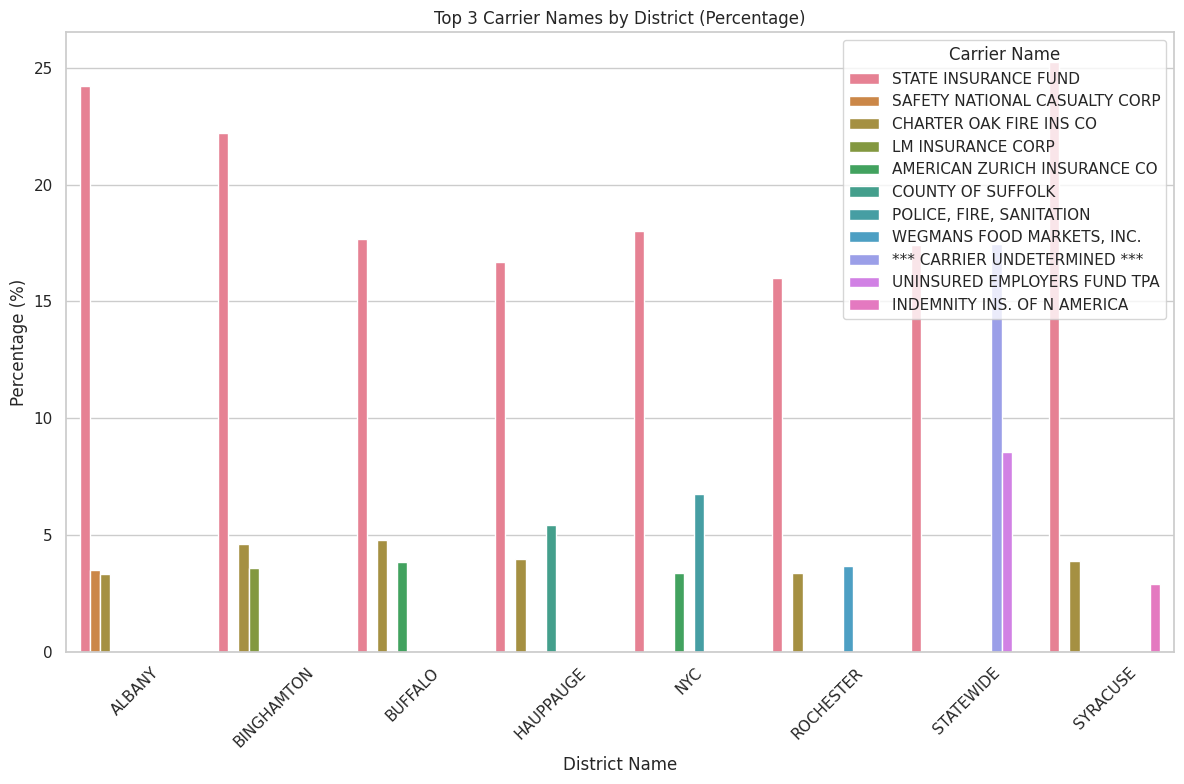

In [ ]:
# Step 1: Calculate counts for each district and carrier name
top_carriers = (
    df_train
    .groupby(['District Name', 'Carrier Name'])
    .size()
    .reset_index(name='Count')
)
# Step 2: Calculate the total count per district
top_carriers['Total Count'] = top_carriers.groupby('District Name')['Count'].transform('sum')
# Step 3: Calculate the percentage of each carrier name within each district
top_carriers['Percentage'] = (top_carriers['Count'] / top_carriers['Total Count']) * 100
# Step 4: Sort and select the top 3 carrier names for each district
top_3_carriers_per_district = (
    top_carriers
    .sort_values(['District Name', 'Percentage'], ascending=[True, False])
    .groupby('District Name')
    .head(3)
)
# Step 5: Plot the percentages as a bar plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
# Bar plot with 'District Name' on x-axis, 'Percentage' on y-axis, and hue as 'Carrier Name'
sns.barplot(
    data=top_3_carriers_per_district,
    x='District Name',
    y='Percentage',
    hue='Carrier Name',
    dodge=True
)
plt.xlabel('District Name')
plt.ylabel('Percentage (%)')
plt.title('Top 3 Carrier Names by District (Percentage)')
# Rotate x-axis labels for readability if needed
plt.xticks(rotation=45)
# Display the legend and the plot
plt.legend(title='Carrier Name')
plt.tight_layout()
plt.show()

Visualization 2: District Name by Industry Code Description

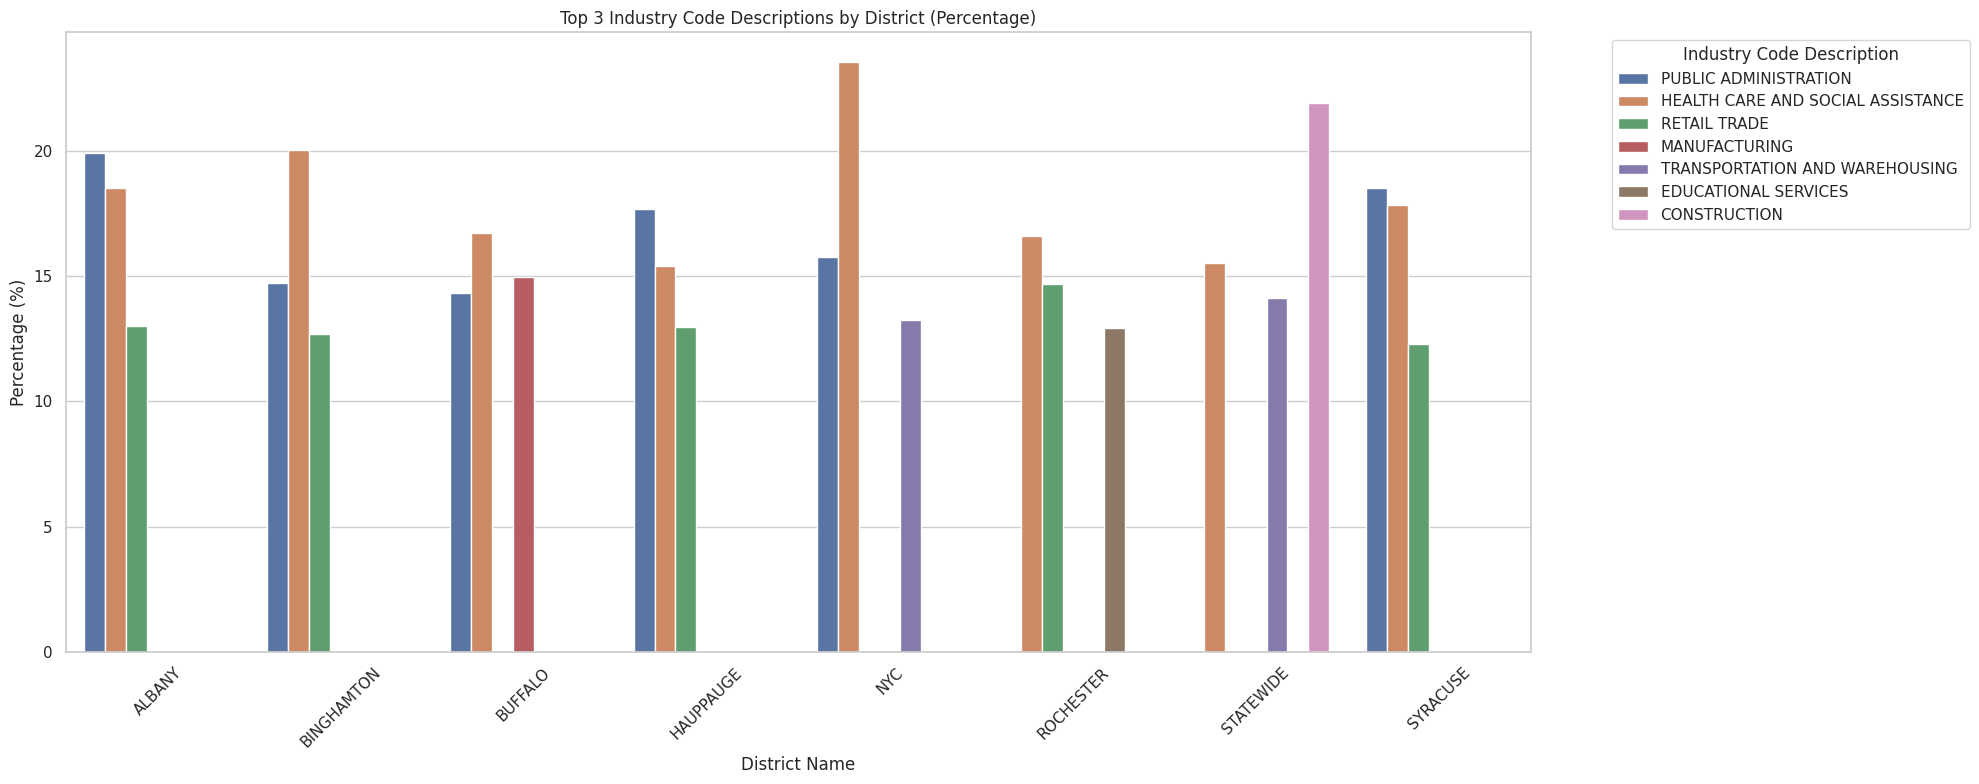

In [ ]:
# Step 1: Calculate counts for each district and industry code description
top_industries = (
    df_train
    .groupby(['District Name', 'Industry Code Description'],observed=False)
    .size()
    .reset_index(name='Count')
)

# Step 2: Calculate the total count per district
top_industries['Total Count'] = top_industries.groupby('District Name',observed=False)['Count'].transform('sum')

# Step 3: Calculate the percentage of each industry code description within each district
top_industries['Percentage'] = (top_industries['Count'] / top_industries['Total Count']) * 100

# Step 4: Sort and select the top 3 industry code descriptions for each district
top_3_industries_per_district = (
    top_industries
    .sort_values(['District Name', 'Percentage'], ascending=[True, False])
    .groupby('District Name',observed=False)
    .head(3)
)

# Step 5: Plot the percentages as a bar plot
plt.figure(figsize=(20, 8))
sns.set(style="whitegrid")

# Bar plot with 'District Name' on x-axis, 'Percentage' on y-axis, and hue as 'Industry Code Description'
sns.barplot(
    data=top_3_industries_per_district,
    x='District Name',
    y='Percentage',
    hue='Industry Code Description',
    dodge=True
)

# Set plot labels and title
plt.xlabel('District Name')
plt.ylabel('Percentage (%)')
plt.title('Top 3 Industry Code Descriptions by District (Percentage)')

# Rotate x-axis labels for readability if needed
plt.xticks(rotation=45)

# Display the legend and the plot
plt.legend(title='Industry Code Description',fancybox=True,alignment='center', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

Visualization 3: District Name by Average Weekly Wage

<ipython-input-160-a21e53d27e7e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


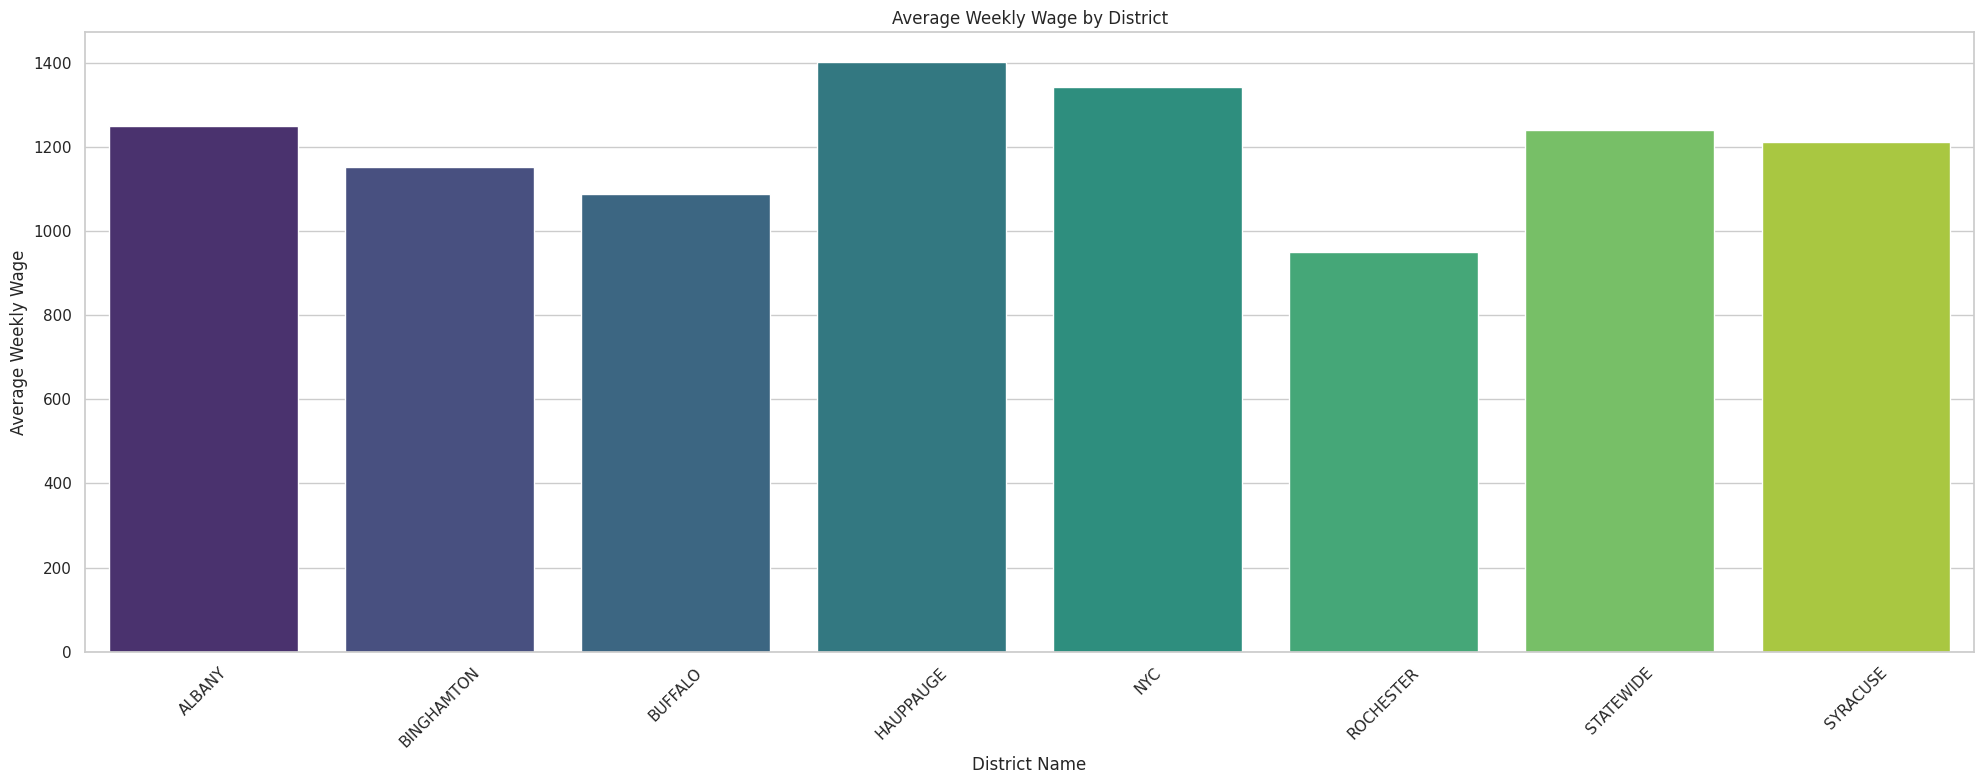

In [ ]:
avg_weekly_wage_per_district = (
    df_train
    .groupby('District Name', observed=False)['Average Weekly Wage']  # Assuming the column name is 'Average Weekly Wage'
    .mean()
    .reset_index(name='Average Weekly Wage')
)

# Step 2: Sort by average weekly wage in descending order
avg_weekly_wage_per_district = avg_weekly_wage_per_district.sort_values(by='Average Weekly Wage', ascending=False)

# Step 3: Plot the average weekly wage for each district as a bar plot
plt.figure(figsize=(20, 8))
sns.set(style="whitegrid")

# Bar plot with 'District Name' on x-axis, 'Average Weekly Wage' on y-axis
sns.barplot(
    data=avg_weekly_wage_per_district,
    x='District Name',
    y='Average Weekly Wage',
    palette='viridis'  # Optional: Change the color palette
)

# Set plot labels and title
plt.xlabel('District Name')
plt.ylabel('Average Weekly Wage')
plt.title('Average Weekly Wage by District')

# Rotate x-axis labels for readability if needed
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

Visualization 4: Gender by Average Weekly Wage

<ipython-input-161-ea4d71f2ca07>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


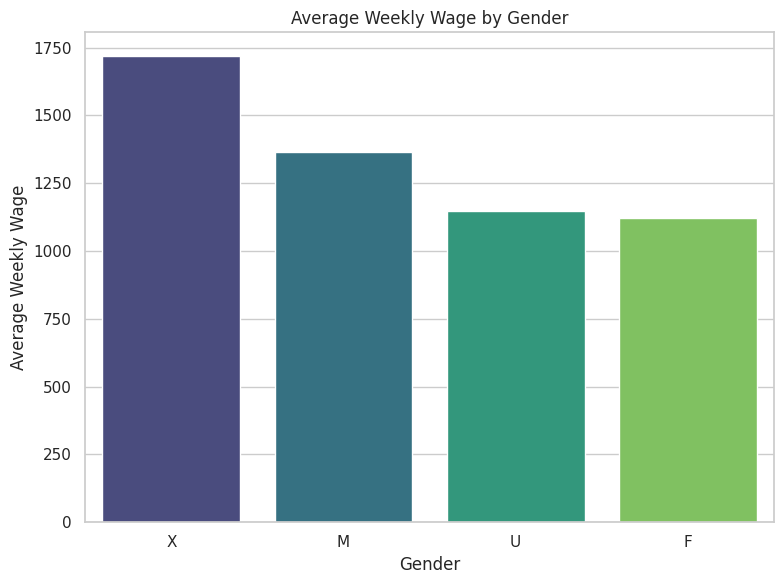

In [ ]:
# Step 1: Calculate the average weekly wage for each gender
avg_weekly_wage_per_gender = (
    df_train
    .groupby('Gender', observed=False)['Average Weekly Wage']  # Grouping by 'Gender' instead of 'District Name'
    .mean()
    .reset_index(name='Average Weekly Wage')
)

# Step 2: Sort by average weekly wage in descending order
avg_weekly_wage_per_gender = avg_weekly_wage_per_gender.sort_values(by='Average Weekly Wage', ascending=False)

# Step 3: Plot the average weekly wage for each gender as a bar plot
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Bar plot with 'Gender' on x-axis, 'Average Weekly Wage' on y-axis
sns.barplot(
    data=avg_weekly_wage_per_gender,
    x='Gender',
    y='Average Weekly Wage',
    palette='viridis'  # Optional: Change the color palette
)

# Set plot labels and title
plt.xlabel('Gender')
plt.ylabel('Average Weekly Wage')
plt.title('Average Weekly Wage by Gender')

# Rotate x-axis labels for readability if needed
plt.xticks(rotation=0)  # You can adjust the rotation if necessary

# Display the plot
plt.tight_layout()
plt.show()


Visualization 5: Gender by Average Weekly Wage

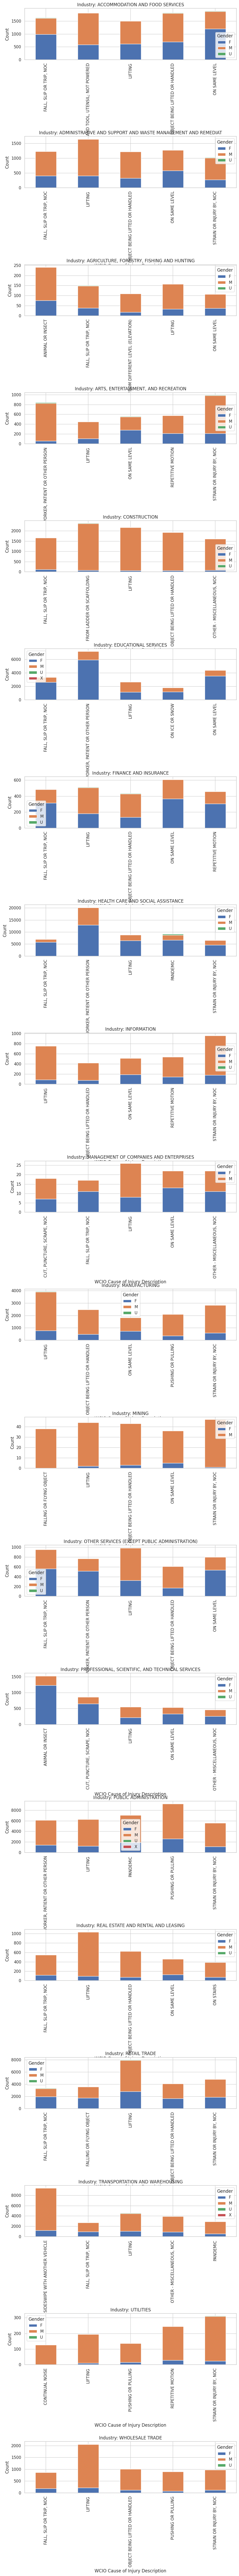

In [ ]:

# Step 1: Group and count occurrences
df_counts = df_train.groupby(['Industry Code Description', 'WCIO Cause of Injury Description', 'Gender']).size().reset_index(name='Count')

# Step 2: Get the top 5 causes for each industry by summing across genders
top_causes = (
    df_counts.groupby(['Industry Code Description', 'WCIO Cause of Injury Description'])['Count']
    .sum()
    .reset_index()
    .sort_values(['Industry Code Description', 'Count'], ascending=[True, False])
    .groupby('Industry Code Description')
    .head(5)
)

# Step 3: Merge back to get gender-specific counts only for the top 5 causes
df_top_causes = df_counts.merge(
    top_causes[['Industry Code Description', 'WCIO Cause of Injury Description']],
    on=['Industry Code Description', 'WCIO Cause of Injury Description'],
    how='inner'
)

# Step 4: Plotting
industries = df_top_causes['Industry Code Description'].unique()
fig, axes = plt.subplots(len(industries), 1, figsize=(10, 5 * len(industries)))

for ax, industry in zip(axes, industries):
    # Filter for each industry
    industry_data = df_top_causes[df_top_causes['Industry Code Description'] == industry]

    # Pivot to create a table suitable for stacked bar plot
    industry_pivot = industry_data.pivot_table(
        index='WCIO Cause of Injury Description', columns='Gender', values='Count', fill_value=0, observed=False
    )

    # Plot
    industry_pivot.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'Industry: {industry}')
    ax.set_ylabel('Count')

    # Set x-label for each plot
    ax.set_xlabel('WCIO Cause of Injury Description')

# Adjust spacing between subplots for better visibility of x labels
plt.tight_layout(pad=3.0)  # Increase padding between subplots
plt.subplots_adjust(hspace=1.5)  # Manually adjust the height space between plots

plt.show()
#

Visualization 6: Age Group and Claim Injury Type

<ipython-input-165-fb2855692e4e>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = df_train.groupby(['Claim Injury Type', 'Age Group']).size().reset_index(name='Count')


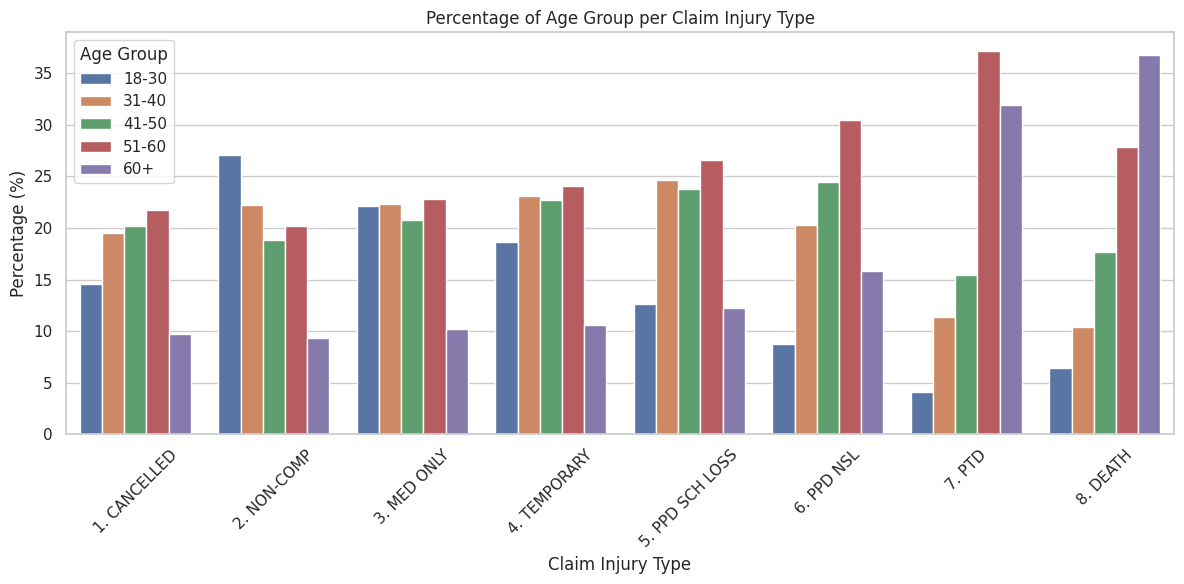

In [ ]:

# Bin Age into categories (e.g., 18-30, 31-40, etc.)
df_train['Age Group'] = pd.cut(df_train['Age at Injury'], bins=[18, 30, 40, 50, 60, 100],
                               labels=['18-30', '31-40', '41-50', '51-60', '60+'])

# Step 1: Group by 'Claim Injury Type' and 'Age Group', then count occurrences
age_group_counts = df_train.groupby(['Claim Injury Type', 'Age Group']).size().reset_index(name='Count')

# Step 2: Calculate the total count for each 'Claim Injury Type'
total_counts = df_train.groupby('Claim Injury Type')['Claim Injury Type'].count().reset_index(name='Total Count')

# Step 3: Merge the counts back to the original grouped data to calculate percentages
age_group_counts = pd.merge(age_group_counts, total_counts, on='Claim Injury Type')

# Step 4: Calculate the percentage
age_group_counts['Percentage'] = (age_group_counts['Count'] / age_group_counts['Total Count']) * 100

# Step 5: (Optional) Drop the 'Total Count' column if not needed
age_group_counts = age_group_counts.drop(columns=['Total Count'])

# Step 6: Plotting the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Claim Injury Type', y='Percentage', hue='Age Group', data=age_group_counts)

# Step 7: Titles and labels
plt.title('Percentage of Age Group per Claim Injury Type')
plt.ylabel('Percentage (%)')
plt.xlabel('Claim Injury Type')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Visualization 7: Industry Code Desccription by Claim Injury Type

<ipython-input-169-c4d1447679cf>:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-169-c4d1447679cf>:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-169-c4d1447679cf>:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-169-c4d1447679cf>:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-169-c4d1447679cf>:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks,

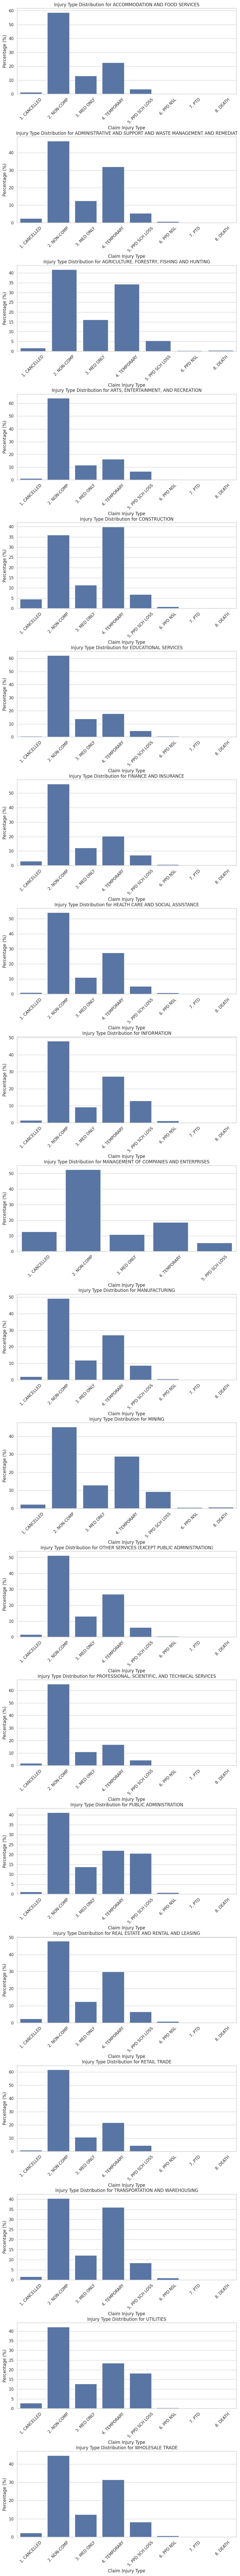

In [ ]:
injury_type_counts = df_train.groupby(['Industry Code Description', 'Claim Injury Type']).size().reset_index(name='Count')

# Step 2: Calculate the total count for each 'Industry Code Description'
total_counts = df_train.groupby('Industry Code Description')['Claim Injury Type'].count().reset_index(name='Total Count')

# Step 3: Merge the counts back to the original grouped data to calculate percentages
injury_type_counts = pd.merge(injury_type_counts, total_counts, on='Industry Code Description')

# Step 4: Calculate the percentage
injury_type_counts['Percentage'] = (injury_type_counts['Count'] / injury_type_counts['Total Count']) * 100

# Step 5: (Optional) Drop the 'Total Count' column if not needed
injury_type_counts = injury_type_counts.drop(columns=['Total Count'])

# Step 6: Plotting (separate bar plots for each 'Industry Code Description')
industries = injury_type_counts['Industry Code Description'].unique()

# Create subplots
fig, axes = plt.subplots(len(industries), 1, figsize=(10, 5 * len(industries)))

# If only one subplot, axes is not a list, so we need to make sure it's always iterable
if len(industries) == 1:
    axes = [axes]

# Create a bar plot for each industry
for ax, industry in zip(axes, industries):
    # Filter data for the current industry
    industry_data = injury_type_counts[injury_type_counts['Industry Code Description'] == industry]

    # Plot the bar plot for each injury type
    sns.barplot(x='Claim Injury Type', y='Percentage', data=industry_data, ax=ax)

    # Set plot title and labels
    ax.set_title(f'Injury Type Distribution for {industry}')
    ax.set_ylabel('Percentage (%)')

    # Rotate x-axis labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Adjust spacing between subplots for better visibility of x labels
plt.tight_layout(pad=3.0)  # Increase padding between subplots
plt.subplots_adjust(hspace=0.5)  # Manually adjust the height space between plots

plt.show()